In [1]:
# using TA-Lib
# http://mrjbq7.github.io/ta-lib/install.html

# copy from Pythonで簡単なモメンタム投資モデルを作る http://qiita.com/sawadybomb/items/9dc9d858aa399c8b4011
# GUI manual https://media.readthedocs.org/pdf/jons-widgets-fork/nicedocs/jons-widgets-fork.pdf

In [2]:
%matplotlib inline
from db import DB
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
import ipywidgets as widgets
from IPython.display import display

In [3]:
conn = sqlite3.connect("brand.sqlite3")
brand_list = psql.read_sql('select * from brand_list where market = "マザーズ"',conn)

In [4]:
codes = {}
for row in brand_list.values:
    codes[row[2]] = row[0]

In [5]:
codes

{'(株)じげん': 3679,
 '(株)はてな': 3930,
 '(株)みんなのウェディング': 3685,
 '(株)アイドママーケティングコミュニケーション': 9466,
 '(株)アイリッジ': 3917,
 '(株)アカツキ': 3932,
 '(株)アクアライン': 6173,
 '(株)アクトコール': 6064,
 '(株)アクロディア': 3823,
 '(株)アスカネット': 2438,
 '(株)アトラエ': 6194,
 '(株)アドウェイズ': 2489,
 '(株)アドバンスト・メディア': 3773,
 '(株)アドベンチャー': 6030,
 '(株)アマナ': 2402,
 '(株)アルファポリス': 9467,
 '(株)アークン': 3927,
 '(株)アールエイジ': 3248,
 '(株)イグニス': 3689,
 '(株)イトクロ': 6049,
 '(株)インソース': 6200,
 '(株)インタースペース': 2122,
 '(株)インテア・ホールディングス': 3734,
 '(株)イントランス': 3237,
 '(株)インベスターズクラウド': 1435,
 '(株)イード': 6038,
 '(株)エクストリーム': 6033,
 '(株)エディア': 3935,
 '(株)エナリス': 6079,
 '(株)エニグモ': 3665,
 '(株)エヌ・ピー・シー': 6255,
 '(株)エボラブルアジア': 6191,
 '(株)エムビーエス': 1401,
 '(株)エンバイオ・ホールディングス': 6092,
 '(株)オウチーノ': 6084,
 '(株)オークファン': 3674,
 '(株)オープンドア': 3926,
 '(株)カイオム・バイオサイエンス': 4583,
 '(株)カナミックネットワーク': 3939,
 '(株)カヤック': 3904,
 '(株)キャリア': 6198,
 '(株)キャンバス': 4575,
 '(株)クラウドワークス': 3900,
 '(株)クロス・マーケティンググループ': 3675,
 '(株)グランディーズ': 3261,
 '(株)グリーンペプタイド': 4594,
 '(株)グローバルウェイ': 3936,
 '(株)グローバルグループ'

In [13]:
def read_data(code=w.value):
    db = DB(code)
    return db.read()

In [16]:
w = widgets.Dropdown(
    options = codes,
    values=3935,
    description='銘柄：'
)
display(w)

button = widgets.Button(description="データ読み込み")
display(button)
button.on_click(read_data(w.value))

code_6095: The table found


In [11]:
momentum = ta.MOM(data['close'].values,250)

length = len(data.index)
cash = [None for row in range(length)]
position = [None for row in range(length)]
asset = [None for row in range(length)]

cash[0] = 100000
position[0] = 0

for i, (index, row) in enumerate(data.iterrows()):
    if i > 0:
        cash[i] = cash[i-1]
        position[i] = position[i-1]
        
        if momentum[i] > 0 and momentum[i-1] < 0:
            amount = cash[i] // row['close']
            position[i] += amount
            cash[i] -= amount * row['close'] + 150
        
        elif momentum[i] < 0 and momentum[i-1] > 0:
            cash[i] += position[i] * row['close'] - 150
            position[i] =0
    asset[i] = cash[i] + position[i] * row['close']

data['asset'] = asset


NameError: name 'data' is not defined

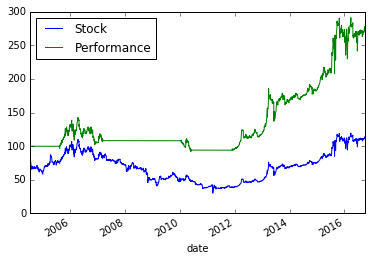

In [66]:
# plot result
d2 = pd.DataFrame()
d2['Stock'] = data['close'] / data['close'][0] * 100
d2['Performance'] = asset
d2['Performance'] = d2['Performance'] / asset[0] * 100
d2 = d2.set_index(pd.to_datetime(data['date']))

d2.plot()


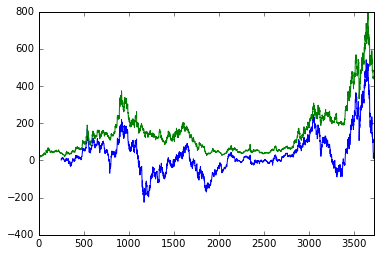

In [47]:
data['momentam'] = ta.MOM(data['close'].values,250)
data['momentam'].plot()
data['close'].plot()